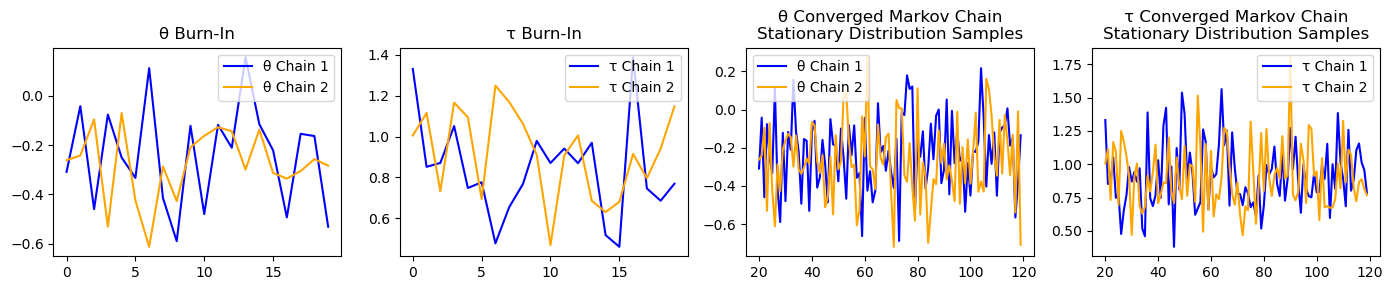

Posterior mean of θ: -0.249
Posterior mean of τ: 0.889
Posterior std of θ: 0.201
Posterior std of τ: 0.225
95% credible interval for θ: [-0.651, 0.145]
95% credible interval for τ: [0.499, 1.383]


In [6]:
# Q1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

# Gibbs Sampler Function
def gibbs_sampler_v3(data, num_samples=10000, burn_in=100, chains=2):
    """
    Gibbs sampler to estimate theta (mean) and tau (precision) using Bayesian inference.

    Parameters:
    - data: Observed dataset (numpy array)
    - num_samples: Total number of Gibbs samples per chain
    - burn_in: Number of initial samples to discard
    - chains: Number of independent chains to run

    Returns:
    - theta_samples: Posterior samples of theta (after burn-in)
    - tau_samples: Posterior samples of tau (after burn-in)
    """
    n = len(data)  # Number of observations in the data
    sample_mean = np.mean(data)  # Sample mean of the data

    # Initialize arrays to store samples for theta and tau
    theta_samples = np.zeros((chains, num_samples))
    tau_samples = np.zeros((chains, num_samples))

    # Initializing theta for each chain with random starting values
    theta_samples[:, 0] = np.random.normal(loc=sample_mean, scale=1, size=chains)

    # Gibbs sampling loop
    for c in range(chains):  # Loop over each chain
        for g in range(1, num_samples):  # Loop over samples
            sum_sq = np.sum((data - theta_samples[c, g - 1]) ** 2)  # Sum of squared residuals
            shape_tau = n / 2 + 1  # Shape parameter for Gamma distribution
            rate_tau = sum_sq / 2  # Rate parameter for Gamma distribution
            tau_samples[c, g] = gamma.rvs(a=shape_tau, scale=1 / rate_tau)  # Sample tau

            var_theta = 1 / (n * tau_samples[c, g])  # Variance of the conditional posterior
            mean_theta = sample_mean  # Mean of the conditional posterior
            theta_samples[c, g] = norm.rvs(loc=mean_theta, scale=np.sqrt(var_theta))  # Sample theta

    # Return samples after discarding the burn-in period
    return theta_samples[:, burn_in:], tau_samples[:, burn_in:]

# Generate synthetic data
n, mean, std_dev = 30, 0, 1  
data = norm.rvs(loc=mean, scale=std_dev, size=n)  # Generate random data from N(mean, std_dev^2)

# Run the Gibbs sampler
chains = 2  
num_samples = 10000  
burn_in = 100  
theta_samples, tau_samples = gibbs_sampler_v3(data, num_samples, burn_in, chains)

# Visualization of the results
fig, ax = plt.subplots(1, 4, figsize=(14, 3))  # Create 4 side-by-side subplots
burn = 20  # Number of samples for burn-in visualization
demo = 120  # Number of samples for stationary distribution visualization

# Titles for each subplot
ax[0].set_title("θ Burn-In")
ax[1].set_title("τ Burn-In")
ax[2].set_title("θ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("τ Converged Markov Chain\nStationary Distribution Samples")

# Plot results for each chain
for c in range(chains):
    # Burn-in visualization
    ax[0].plot(theta_samples[c, :burn], label=f"θ Chain {c+1}", color="blue" if c == 0 else "orange")
    ax[1].plot(tau_samples[c, :burn], label=f"τ Chain {c+1}", color="blue" if c == 0 else "orange")
    # Stationary distribution visualization
    ax[2].plot(range(burn, demo), theta_samples[c, :demo-burn], label=f"θ Chain {c+1}", color="blue" if c == 0 else "orange")
    ax[3].plot(range(burn, demo), tau_samples[c, :demo-burn], label=f"τ Chain {c+1}", color="blue" if c == 0 else "orange")

# Add legends to each subplot
for a in ax:
    a.legend()

# Adjust layout for better spacing and display the plots
plt.tight_layout()
plt.show()

# Posterior Statistics
theta_flat = theta_samples.flatten() 
tau_flat = tau_samples.flatten()  

# Calculate 95% credible intervals
theta_ci = np.percentile(theta_flat, [2.5, 97.5])
tau_ci = np.percentile(tau_flat, [2.5, 97.5])

# Display posterior summary statistics
print(f"Posterior mean of θ: {np.mean(theta_flat):.3f}")
print(f"Posterior mean of τ: {np.mean(tau_flat):.3f}")
print(f"Posterior std of θ: {np.std(theta_flat):.3f}")
print(f"Posterior std of τ: {np.std(tau_flat):.3f}")
print(f"95% credible interval for θ: [{theta_ci[0]:.3f}, {theta_ci[1]:.3f}]")
print(f"95% credible interval for τ: [{tau_ci[0]:.3f}, {tau_ci[1]:.3f}]")



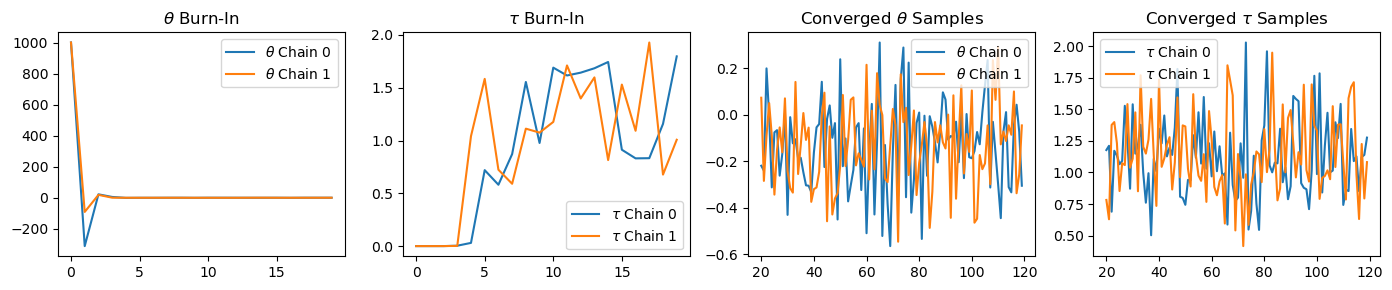

Posterior Mean for θ: [-0.13098712 -0.12150241]
Posterior Standard Deviation for θ: [0.17523067 0.17773377]
95% Credible Interval for θ: [-0.47289538779027057, 0.2225384169744206]
95% Credible Interval for τ: [0.6492483841174298, 1.812331943135158]


In [1]:
# Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

# Parameters
n = 30  # Number of data points
x = norm.rvs(loc=0, scale=1, size=n)  # Generate normal data
C, G = 2, 1000  # Number of chains and Gibbs samples
alpha, lambd = 2.0, 2.0  # Hyperparameters for the Gamma prior

# Initialize chains
theta = np.zeros((C, G))
tau = np.zeros((C, G))
theta[:, 0] = 1000  # Initial value for theta

# Gibbs Sampling
for c in range(C):  # Loop over chains
    for g in range(1, G):  # Loop over samples
        # Update tau (Gamma conditional posterior)
        sum_squared_diff = np.sum((x - theta[c, g - 1]) ** 2)
        tau_shape = alpha / 2 + n / 2
        tau_rate = lambd / 2 + sum_squared_diff / 2
        tau[c, g] = gamma.rvs(a=tau_shape, scale=1 / tau_rate)
        
        # Update theta (Normal conditional posterior)
        theta_mean = np.mean(x)
        theta_var = 1 / (n * tau[c, g])
        theta[c, g] = norm.rvs(loc=theta_mean, scale=np.sqrt(theta_var))

# Plotting the results
burn_in = 20
demo = 120
fig, ax = plt.subplots(1, 4, figsize=(14, 3))

# Plot Burn-In phase for theta and tau
ax[0].plot(theta[0, :burn_in], label=r"$\theta$ Chain 0")
ax[0].plot(theta[1, :burn_in], label=r"$\theta$ Chain 1")
ax[0].set_title(r"$\theta$ Burn-In")
ax[0].legend()

ax[1].plot(tau[0, :burn_in], label=r"$\tau$ Chain 0")
ax[1].plot(tau[1, :burn_in], label=r"$\tau$ Chain 1")
ax[1].set_title(r"$\tau$ Burn-In")
ax[1].legend()

# Plot stationary samples for theta and tau
ax[2].plot(range(burn_in, demo), theta[0, burn_in:demo], label=r"$\theta$ Chain 0")
ax[2].plot(range(burn_in, demo), theta[1, burn_in:demo], label=r"$\theta$ Chain 1")
ax[2].set_title(r"Converged $\theta$ Samples")
ax[2].legend()

ax[3].plot(range(burn_in, demo), tau[0, burn_in:demo], label=r"$\tau$ Chain 0")
ax[3].plot(range(burn_in, demo), tau[1, burn_in:demo], label=r"$\tau$ Chain 1")
ax[3].set_title(r"Converged $\tau$ Samples")
ax[3].legend()

plt.tight_layout()
plt.show()

# Compute posterior statistics
theta_mean = np.mean(theta[:, burn_in:], axis=1)
theta_std = np.std(theta[:, burn_in:], axis=1)
theta_credible = [np.percentile(theta[:, burn_in:].flatten(), 2.5),
                  np.percentile(theta[:, burn_in:].flatten(), 97.5)]

tau_credible = [np.percentile(tau[:, burn_in:].flatten(), 2.5),
                np.percentile(tau[:, burn_in:].flatten(), 97.5)]

# Display the posterior statistics
print(f"Posterior Mean for θ: {theta_mean}")
print(f"Posterior Standard Deviation for θ: {theta_std}")
print(f"95% Credible Interval for θ: {theta_credible}")
print(f"95% Credible Interval for τ: {tau_credible}")


# Q3: Multinomial-Dirichlet Model Posterior Derivation

### Problem Setup

1. **Observed Data**:  
   $\boldsymbol{x} = (x_1, x_2, \dots, x_k) \sim \text{Multinomial}(n, \boldsymbol{\theta})$,  
   where $n = \sum_{i=1}^k x_i$ is the total number of trials, and $\boldsymbol{\theta} = (\theta_1, \theta_2, \dots, \theta_k)$ represents the probabilities for each category.

2. **Prior Distribution**:  
   $\boldsymbol{\theta} \sim \text{Dirichlet}(\alpha_1, \alpha_2, \dots, \alpha_k)$,  
   where the parameters $\alpha_i > 0$ are the prior parameters.

---

### Derivation of the Posterior

From Bayes' theorem:  
$$
p(\boldsymbol{\theta} | \boldsymbol{x}) \propto p(\boldsymbol{x} | \boldsymbol{\theta}) \cdot p(\boldsymbol{\theta}).
$$

#### Step 1: Multinomial Likelihood  
The likelihood function of the multinomial distribution is:  
$$
p(\boldsymbol{x} | \boldsymbol{\theta}) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i}.
$$

#### Step 2: Dirichlet Prior  
The prior density of the Dirichlet distribution is given by:  
$$
p(\boldsymbol{\theta}) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1},
$$  
where $B(\alpha)$ is the Beta function, defined as:  
$$
B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}.
$$

#### Step 3: Combine Likelihood and Prior  
Substituting the likelihood and prior into Bayes' theorem:  
$$
p(\boldsymbol{\theta} | \boldsymbol{x}) \propto \left( \prod_{i=1}^k \theta_i^{x_i} \right) \cdot \left( \prod_{i=1}^k \theta_i^{\alpha_i - 1} \right).
$$  

Simplify the exponents:  
$$
p(\boldsymbol{\theta} | \boldsymbol{x}) \propto \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}.
$$

#### Step 4: Recognize as Dirichlet  
The posterior has the same functional form as a Dirichlet distribution. Therefore:  
$$
\boldsymbol{\theta} | \boldsymbol{x} \sim \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_k + x_k).
$$
